<a href="https://colab.research.google.com/github/Burentugs-x/flask_tutorial_bu/blob/main/10_working_with_APIs/api_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import requests

# API URL
url = "https://pokeapi.co/api/v2/pokemon/arbok"  # Replace with your API endpoint


# Sending GET request
response = requests.get(url)

In [2]:

# API URL

name = "gholdengo"
url = f"https://pokeapi.co/api/v2/pokemon/{name}"  # Replace with your API endpoint
# Sending GET request
response = requests.get(url)
raw_data = response.json()
ability = raw_data['abilities'][0]['ability']['name']
height = raw_data['height']
print(f"{name}'s abitility is {ability} and height is {height}.")

gholdengo's abitility is good-as-gold and height is 12.


In [3]:

def show_ability(name):
  url = f"https://pokeapi.co/api/v2/pokemon/{name}"  # Replace with your API endpoint
  # Sending GET request
  response = requests.get(url)
  raw_data = response.json()
  ability = raw_data['abilities'][0]['ability']['name']
  height = raw_data['height']
  order = raw_data['order']
  print(f"{name}'s abitility is {ability} and height is {height}. Order is {order}")

In [12]:

pokemon_names = [
    "Pikachu",
    "Charmander",
    "Bulbasaur",
    "Squirtle",
    "Mewtwo",
    "Eevee",
    "Gengar",
    "Lucario",
    "Dragonite",
    "Arceus"
]

In [5]:

for name in pokemon_names:
  print(name)
  show_ability(name.lower())

Pikachu
pikachu's abitility is static and height is 4. Order is 35
Charmander
charmander's abitility is blaze and height is 6. Order is 5
Bulbasaur
bulbasaur's abitility is overgrow and height is 7. Order is 1
Squirtle
squirtle's abitility is torrent and height is 5. Order is 10
Mewtwo
mewtwo's abitility is pressure and height is 20. Order is 245
Eevee
eevee's abitility is run-away and height is 3. Order is 215
Gengar
gengar's abitility is cursed-body and height is 15. Order is 149
Lucario
lucario's abitility is steadfast and height is 12. Order is 573
Dragonite
dragonite's abitility is inner-focus and height is 22. Order is 244
Arceus
arceus's abitility is multitype and height is 32. Order is 608


Enter the name of the Pokémon: Charmander


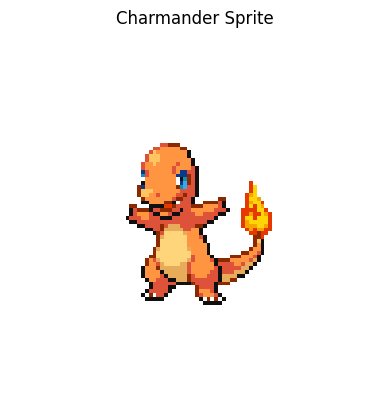

In [6]:
import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Function to fetch Pokémon sprite
def fetch_pokemon_sprite(pokemon_name):
    url = f"https://pokeapi.co/api/v2/pokemon/{pokemon_name}"  # API endpoint
    response = requests.get(url)

    if response.status_code == 200:
        raw_data = response.json()
        sprite_url = raw_data['sprites']['front_default']
        return sprite_url
    else:
        print(f"Error: Couldn't find Pokémon {pokemon_name}")
        return None

# Function to display Pokémon sprite
def display_pokemon_sprite(sprite_url, pokemon_name):
    response = requests.get(sprite_url)
    if response.status_code == 200:
        image = Image.open(BytesIO(response.content))

        # Display image using matplotlib
        plt.imshow(image)
        plt.axis('off')  # Turn off axes
        plt.title(f"{pokemon_name.capitalize()} Sprite")
        plt.show()
    else:
        print("Error: Unable to fetch sprite image.")

# Main script
if __name__ == "__main__":
    pokemon_name = input("Enter the name of the Pokémon: ").lower()
    sprite_url = fetch_pokemon_sprite(pokemon_name)

    if sprite_url:
        display_pokemon_sprite(sprite_url, pokemon_name)


In [14]:
def show_stat(name):
  url = f"https://pokeapi.co/api/v2/pokemon/{name}"
  response = requests.get(url)
  raw_data = response.json()
  base_stat = raw_data['base_stat']
  base_experience = raw_data['base_experience']
  defense = raw_data['defense']
  print(f"{name}'s base stat is {base_stat}, base experience is {base_experience}, and defense is {defense}")

In [15]:
for name in pokemon_names:
  print(name)
  show_stat(name.lower())

Pikachu


KeyError: 'base_stat'

In [16]:
def show_stat(name):
    url = f"https://pokeapi.co/api/v2/pokemon/{name}"
    response = requests.get(url)
    raw_data = response.json()
    base_experience = raw_data['base_experience']
    defense = None
    base_stat = None
    for stat in raw_data['stats']:
        if stat['stat']['name'] == 'defense':
            defense = stat['base_stat']
        if stat['stat']['name'] == 'hp':
            base_stat = stat['base_stat']
    print(f"{name}'s base stat (HP) is {base_stat}, base experience is {base_experience}, and defense is {defense}.")

In [18]:
pokemon_names = [
    "Pikachu",
    "Charmander",
    "Bulbasaur",
    "Squirtle",
    "Mewtwo",
    "Eevee",
    "Gengar",
    "Lucario",
    "Dragonite",
    "Arceus"
]

In [19]:
for name in pokemon_names:
    print(name)
    show_stat(name.lower())


Pikachu
pikachu's base stat (HP) is 35, base experience is 112, and defense is 40.
Charmander
charmander's base stat (HP) is 39, base experience is 62, and defense is 43.
Bulbasaur
bulbasaur's base stat (HP) is 45, base experience is 64, and defense is 49.
Squirtle
squirtle's base stat (HP) is 44, base experience is 63, and defense is 65.
Mewtwo
mewtwo's base stat (HP) is 106, base experience is 340, and defense is 90.
Eevee
eevee's base stat (HP) is 55, base experience is 65, and defense is 50.
Gengar
gengar's base stat (HP) is 60, base experience is 250, and defense is 60.
Lucario
lucario's base stat (HP) is 70, base experience is 184, and defense is 70.
Dragonite
dragonite's base stat (HP) is 91, base experience is 300, and defense is 95.
Arceus
arceus's base stat (HP) is 120, base experience is 324, and defense is 120.


In [25]:
def get_defense(name):
    for stat in raw_data['stats']:
        if stat['stat']['name'] == 'defense':
            return stat['base_stat']

max_defense_pokemon = max(pokemon_names, key=get_defense)

The Pokémon with the highest defense is Pikachu, with a defense of 95.


In [32]:
for name in pokemon_names:
    print(get_defense)
    get_defense(name.lower())


<function get_defense at 0x7d7ed5e22f80>
<function get_defense at 0x7d7ed5e22f80>
<function get_defense at 0x7d7ed5e22f80>
<function get_defense at 0x7d7ed5e22f80>
<function get_defense at 0x7d7ed5e22f80>
<function get_defense at 0x7d7ed5e22f80>
<function get_defense at 0x7d7ed5e22f80>
<function get_defense at 0x7d7ed5e22f80>
<function get_defense at 0x7d7ed5e22f80>
<function get_defense at 0x7d7ed5e22f80>
